# Projeto IA - Classificação de diagnóstico de pneumonia

Este projeto tem como objetivo a classificação de diagnóstico de pneumonia em imagens de raio-x de tórax. O dataset utilizado foi obtido no Kaggle e pode ser encontrado [aqui](https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia).

O dataset é composto por 5.856 imagens de raio-x de tórax, sendo 4.232 imagens de pacientes diagnosticados com pneumonia e 1.624 imagens de pacientes saudáveis. As imagens estão divididas em 3 pastas: `train`, `test` e `val` (para fazer a validação), sendo que a pasta `train` contém 5.216 imagens, a pasta `test` contém 624 imagens e a pasta `val` contém 16 imagens.

O dataset utilizado teve validação de 3 especialistas clínicos para filtrar as imagens usadas e para certificar o que foi classificado em cada pasta como "NORMAL" ou "PNEUMONIA".

## Rodar o projeto:

Faça a instalação do Python 3.10+ na máquina (recomendo usar o venv), instale o PIP para baixar as dependências e execute o comando abaixo para instalar as dependências necessárias:

```bash
pip install tensorflow keras scipy numpy matplotlib opencv-python kagglehub
```

Esse comando instalará o TensorFlow, Keras, SciPy (que serve como dependência do Keras), NumPy, Matplotlib, OpenCV e KaggleHub.

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import kagglehub

path = kagglehub.dataset_download("paultimothymooney/chest-xray-pneumonia")

print("Path to dataset: ", path)

train_dir = f'{path}/chest_xray/train'
val_dir = f'{path}/chest_xray/val'
test_dir = f'{path}/chest_xray/test'

IMG_SIZE = 150

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=32,
    class_mode='binary'
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=32,
    class_mode='binary'
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=32,
    class_mode='binary'
)

Path to dataset:  C:\Users\vc_la\.cache\kagglehub\datasets\paultimothymooney\chest-xray-pneumonia\versions\2
Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Saída binária: pneumonia ou não
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [9]:
history = model.fit(train_generator, validation_data=val_generator, epochs=10)

Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 152s 924ms/step - accuracy: 0.7477 - loss: 0.5489 - val_accuracy: 0.7500 - val_loss: 0.5469
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 144s 886ms/step - accuracy: 0.8801 - loss: 0.2804 - val_accuracy: 0.8125 - val_loss: 0.7225
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 153s 937ms/step - accuracy: 0.8986 - loss: 0.2432 - val_accuracy: 0.7500 - val_loss: 0.9007
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 124s 760ms/step - accuracy: 0.9227 - loss: 0.1909 - val_accuracy: 0.8125 - val_loss: 0.5060
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 106s 650ms/step - accuracy: 0.9247 - loss: 0.1935 - val_accuracy: 0.6875 - val_loss: 0.7740
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 128s 782ms/step - accuracy: 0.9289 - loss: 0.1832 - val_accuracy: 0.7500 - val_loss: 0.8618
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 151s 926ms/step - accuracy: 0.9463 - loss: 0.1557 - val_accuracy: 0.6250 - val_loss: 1.0239
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 128s 779ms/step - accuracy: 0.9434 -

In [10]:
test_loss, test_acc = model.evaluate(test_generator)
print(f'Acurácia no conjunto de teste: {test_acc * 100:.2f}%')

20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 323ms/step - accuracy: 0.8737 - loss: 0.3498
Acurácia no conjunto de teste: 87.98%



======= Acurácia de validação =======
Valor da acurácia da época 1: 0.75
Valor da acurácia da época 2: 0.81
Valor da acurácia da época 3: 0.75
Valor da acurácia da época 4: 0.81
Valor da acurácia da época 5: 0.69
Valor da acurácia da época 6: 0.75
Valor da acurácia da época 7: 0.62
Valor da acurácia da época 8: 0.75
Valor da acurácia da época 9: 0.75
Valor da acurácia da época 10: 0.69


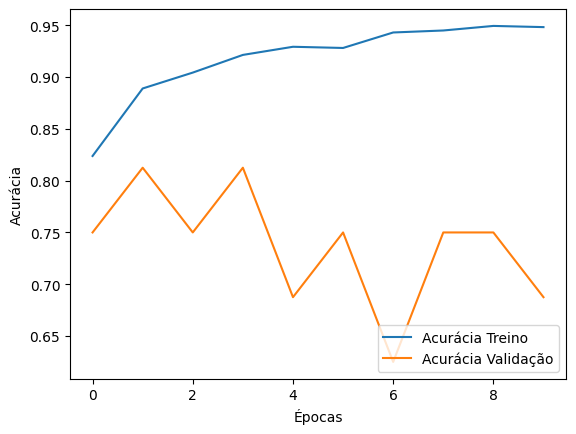

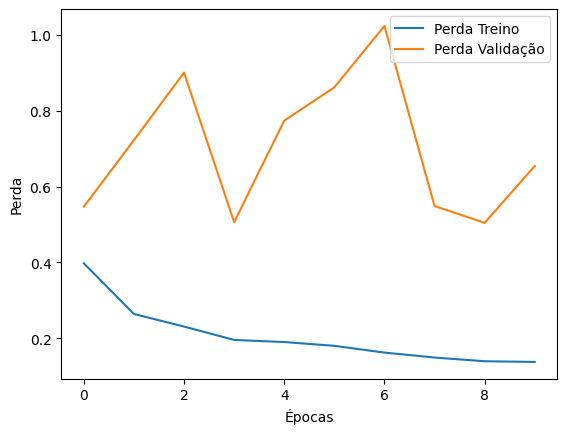

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Acurácia Treino')
plt.plot(history.history['val_accuracy'], label='Acurácia Validação')
# print(f"Quantidade de épocas: {len(history.history['accuracy'])}")
# for i in range(len(history.history['accuracy'])):
#     print(f"Valor da acurácia da época {i + 1}: {history.history['accuracy'][i]:.2f}")

print(f"\n======= Acurácia de validação =======")
for i in range(len(history.history['val_accuracy'])):
    print(f"Valor da acurácia da época {i + 1}: {history.history['val_accuracy'][i]:.2f}")
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['loss'], label='Perda Treino')
plt.plot(history.history['val_loss'], label='Perda Validação')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend(loc='upper right')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
Total de erros no conjunto de validação: 9
Informações sobre os erros salvas em 'validation_errors.json'.


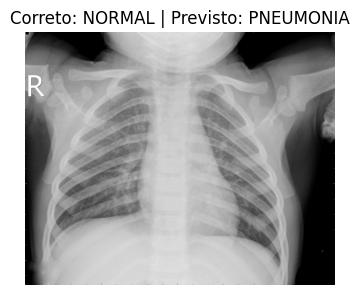

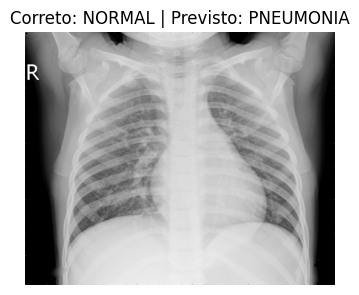

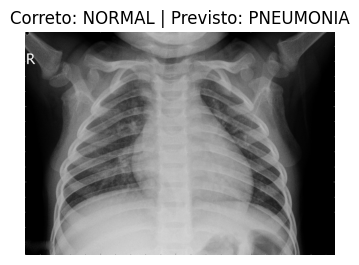

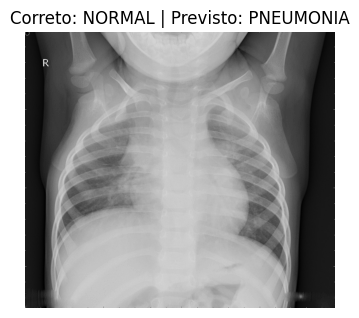

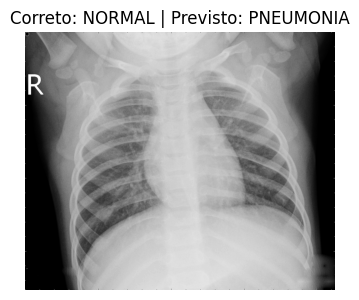

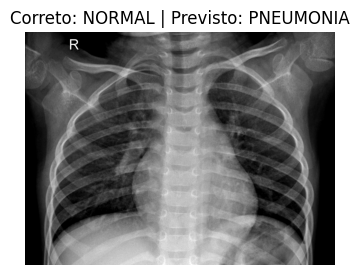

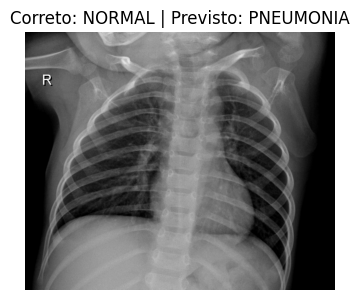

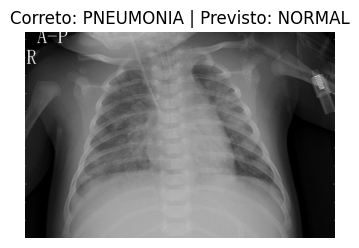

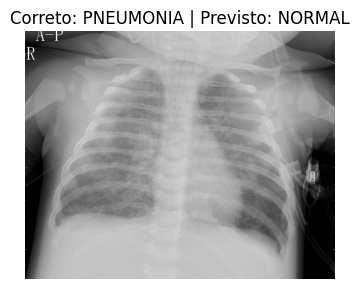

In [13]:
import numpy as np
import json
import matplotlib.pyplot as plt

val_generator.reset()
predictions = model.predict(val_generator, steps=val_generator.samples // val_generator.batch_size + 1)

predicted_classes = (predictions > 0.5).astype(int).flatten()

true_labels = val_generator.classes

errors = np.where(predicted_classes != true_labels)[0]
print(f"Total de erros no conjunto de validação: {len(errors)}")

error_info = []

for idx in errors:
    image_path = val_generator.filepaths[idx]
    true_label = "PNEUMONIA" if true_labels[idx] == 1 else "NORMAL"
    predicted_label = "PNEUMONIA" if predicted_classes[idx] == 1 else "NORMAL"
    error_info.append({
        "image_path": image_path,
        "true_label": true_label,
        "predicted_label": predicted_label
    })

with open("validation_errors.json", "w") as f:
    json.dump(error_info, f, indent=4)

print("Informações sobre os erros salvas em 'validation_errors.json'.")

def plot_errors(errors, num_images):
    for i, error in enumerate(errors[:num_images]):
        image = plt.imread(error["image_path"])
        plt.figure(figsize=(4, 4))
        plt.imshow(image, cmap='gray')
        plt.title(f"Correto: {error['true_label']} | Previsto: {error['predicted_label']}")
        plt.axis('off')
        plt.show()

plot_errors(error_info, len(error_info))